# An Overfitting Dilemma

XGBoost Default Hyperparameters vs GenericBooster + LinearRegression Default Hyperparameters

## Introduction

This post investigates the comparison between XGBoost's balanced accuracy using default hyperparameters across 72 datasets and the [GenericBooster](https://github.com/Techtonique/genbooster) with Linear Regression as its base learner, also with default settings. While XGBoost tends to overfit without tuning—resulting in higher test set balanced accuracy—the GenericBooster approach yields training and test errors that are much more closely correlated, though with a generally lower test set balanced accuracy.

## What We'll Cover

1. Setting up the environment with necessary packages
2. Loading and preparing the data
3. Comparing model performances
4. Analyzing overfitting patterns
5. Drawing conclusions about which approach might be better for specific scenarios

Let's dive into the implementation and analysis.

# Install Required Packages

In [18]:
# Install required packages
!pip install git+https://github.com/Techtonique/genbooster.git
!pip install nnetsauce
!pip install xgboost
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install tqdm

  Cloning https://github.com/Techtonique/genbooster.git to /private/var/folders/cp/_pjh4tv50jv96b4b2_xp6l2c0000gp/T/pip-req-build-w0e02p5_
  Running command git clone --filter=blob:none --quiet https://github.com/Techtonique/genbooster.git /private/var/folders/cp/_pjh4tv50jv96b4b2_xp6l2c0000gp/T/pip-req-build-w0e02p5_
  Running command git clone --filter=blob:none --quiet https://github.com/Techtonique/genbooster.git /private/var/folders/cp/_pjh4tv50jv96b4b2_xp6l2c0000gp/T/pip-req-build-w0e02p5_
  Resolved https://github.com/Techtonique/genbooster.git to commit 576f5078c120ea4ab88177435c9bb5843210f4bc
  Installing build dependencies ...   Resolved https://github.com/Techtonique/genbooster.git to commit 576f5078c120ea4ab88177435c9bb5843210f4bc
  Installing build dependencies ... -done
  Getting requirements to build wheel ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (pyproject.toml) ... -done
done


# Import the necessary packages:

In [19]:
# Import all required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro
from os import name
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [20]:
import xgboost as xgb
import joblib
import requests
import io

from genbooster.genboosterclassifier import BoosterClassifier
from genbooster.randombagclassifier import RandomBagClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from tqdm import tqdm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from time import time

# Fetch Datasets for Analysis

Obtain 72 datasets, a reduced form of the openml-cc18, available at [https://github.com/thierrymoudiki/openml-cc18-reduced](https://github.com/thierrymoudiki/openml-cc18-reduced).

In [21]:
# Fetch the file content from the URL - **Use the raw file URL!**
url = 'https://github.com/thierrymoudiki/openml-cc18-reduced/raw/main/openml-cc18-Xys-2024-05-20.pkl'

# Use a session to handle potential connection interruptions
session = requests.Session()
response = session.get(url, stream=True)
response.raise_for_status()  # Raise an exception for bad responses

# Load the data from the downloaded content in chunks
with io.BytesIO() as buffer:
    for chunk in response.iter_content(chunk_size=1024*1024):  # Download in 1MB chunks
        buffer.write(chunk)
    buffer.seek(0)  # Reset buffer position to the beginning
    clf_datasets = joblib.load(buffer)

# 1 - xgboost results

In [22]:
results = {}

balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

for i, dataset in tqdm(enumerate(clf_datasets.items())):
  dataset_name = dataset[0]
  print("\n ----------", (i + 1), "/", len(clf_datasets.items()), ": ", dataset_name)
  try:
    X, y = dataset[1]['dataset'][0], dataset[1]['dataset'][1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Split dataset into training and testing sets
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    # Calculate balanced accuracy
    balanced_acc_train = balanced_accuracy_score(y_train, y_pred_train)
    balanced_acc_test = balanced_accuracy_score(y_test, y_pred)
    print("Training Balanced Accuracy:", balanced_acc_train)
    print("Testing Balanced Accuracy:", balanced_acc_test)
    results[dataset_name] = {"training_score": balanced_acc_train,
                             "testing_score": balanced_acc_test}
  except:
    print("Error")

1it [00:00,  6.77it/s]


 ---------- 1 / 72 :  kr-vs-kp
Training Balanced Accuracy: 0.9793965874420882
Testing Balanced Accuracy: 0.975187969924812

 ---------- 2 / 72 :  letter


2it [00:02,  1.61s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7513736263736264

 ---------- 3 / 72 :  balance-scale


3it [00:03,  1.09s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7260334744908249

 ---------- 4 / 72 :  mfeat-factors


4it [00:04,  1.01it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.86

 ---------- 5 / 72 :  mfeat-fourier


6it [00:05,  1.43it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.86

 ---------- 6 / 72 :  breast-w
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9470108695652174

 ---------- 7 / 72 :  mfeat-karhunen


7it [00:06,  1.31it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.905

 ---------- 8 / 72 :  mfeat-morphological


8it [00:07,  1.06it/s]

Training Balanced Accuracy: 0.9862499999999998
Testing Balanced Accuracy: 0.7950000000000002

 ---------- 9 / 72 :  mfeat-zernike


9it [00:08,  1.01s/it]

Training Balanced Accuracy: 0.99875
Testing Balanced Accuracy: 0.7799999999999999

 ---------- 10 / 72 :  cmc


10it [00:09,  1.18it/s]

Training Balanced Accuracy: 0.9798009974256786
Testing Balanced Accuracy: 0.6773695839418791

 ---------- 11 / 72 :  optdigits


12it [00:10,  1.46it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.905

 ---------- 12 / 72 :  credit-approval
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8353204172876304

 ---------- 13 / 72 :  credit-g


13it [00:10,  1.89it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6702380952380952

 ---------- 14 / 72 :  pendigits


15it [00:11,  2.06it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9240601503759398

 ---------- 15 / 72 :  diabetes
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7055555555555556

 ---------- 16 / 72 :  spambase


16it [00:11,  2.56it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9041740767862747

 ---------- 17 / 72 :  splice


18it [00:12,  3.03it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9529914529914528

 ---------- 18 / 72 :  tic-tac-toe
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9776119402985075

 ---------- 19 / 72 :  vehicle


20it [00:12,  3.02it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7570075757575757

 ---------- 20 / 72 :  electricity
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.759079283887468

 ---------- 21 / 72 :  satimage


21it [00:13,  2.19it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8195766960114664

 ---------- 22 / 72 :  eucalyptus


23it [00:14,  2.39it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6379919821780285

 ---------- 23 / 72 :  sick
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9583333333333333

 ---------- 24 / 72 :  vowel


24it [00:15,  1.56it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.898989898989899

 ---------- 25 / 72 :  isolet


25it [00:18,  1.26s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6002747252747253

 ---------- 26 / 72 :  analcatdata_authorship


26it [00:18,  1.01it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9850446428571429

 ---------- 27 / 72 :  analcatdata_dmft


27it [00:19,  1.00it/s]

Training Balanced Accuracy: 0.5354622066211941
Testing Balanced Accuracy: 0.1808442851453604

 ---------- 28 / 72 :  mnist_784


29it [00:21,  1.15it/s]

Training Balanced Accuracy: 0.9974358974358974
Testing Balanced Accuracy: 0.5634728124659475

 ---------- 29 / 72 :  pc4
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7357954545454546

 ---------- 30 / 72 :  pc3


31it [00:21,  1.94it/s]

Training Balanced Accuracy: 0.9939024390243902
Testing Balanced Accuracy: 0.6861111111111111

 ---------- 31 / 72 :  jm1
Training Balanced Accuracy: 0.9894845464612907
Testing Balanced Accuracy: 0.6107660455486542

 ---------- 32 / 72 :  kc2


33it [00:22,  2.91it/s]

Training Balanced Accuracy: 0.9764705882352941
Testing Balanced Accuracy: 0.56078860898138

 ---------- 33 / 72 :  kc1
Training Balanced Accuracy: 0.9660003848559195
Testing Balanced Accuracy: 0.7666539415919069

 ---------- 34 / 72 :  pc1


35it [00:22,  3.99it/s]

Training Balanced Accuracy: 0.9818181818181818
Testing Balanced Accuracy: 0.783026113671275

 ---------- 35 / 72 :  adult
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7280701754385965

 ---------- 36 / 72 :  Bioresponse


37it [00:22,  5.01it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7790603891521323

 ---------- 37 / 72 :  wdbc
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9404761904761905

 ---------- 38 / 72 :  phoneme


39it [00:23,  5.21it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8790119004688064

 ---------- 39 / 72 :  qsar-biodeg
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9401862866120525

 ---------- 40 / 72 :  wall-robot-navigation


40it [00:23,  4.37it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9885802469135803

 ---------- 41 / 72 :  semeion


42it [00:25,  2.05it/s]

Training Balanced Accuracy: 0.6431816659664762
Testing Balanced Accuracy: 0.63

 ---------- 42 / 72 :  ilpd
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.5379163713678242

 ---------- 43 / 72 :  madelon


44it [00:25,  3.07it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.845

 ---------- 44 / 72 :  nomao
Training Balanced Accuracy: 0.9890350877192983
Testing Balanced Accuracy: 0.9456508403876824

 ---------- 45 / 72 :  ozone-level-8hr


45it [00:25,  3.67it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7585355820649938

 ---------- 46 / 72 :  cnae-9


46it [00:26,  2.37it/s]

Training Balanced Accuracy: 0.7333304959709455
Testing Balanced Accuracy: 0.699604743083004

 ---------- 47 / 72 :  first-order-theorem-proving


47it [00:27,  1.65it/s]

Training Balanced Accuracy: 0.9974161661661661
Testing Balanced Accuracy: 0.44510582010582017

 ---------- 48 / 72 :  banknote-authentication
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 1.0

 ---------- 49 / 72 :  blood-transfusion-service-center


50it [00:28,  3.00it/s]

Training Balanced Accuracy: 0.8444372374598468
Testing Balanced Accuracy: 0.6337719298245614

 ---------- 50 / 72 :  PhishingWebsites
Training Balanced Accuracy: 0.9715260585285342
Testing Balanced Accuracy: 0.9516145358841988

 ---------- 51 / 72 :  cylinder-bands


52it [00:28,  3.90it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7994389901823282

 ---------- 52 / 72 :  bank-marketing
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.6352247605011054

 ---------- 53 / 72 :  GesturePhaseSegmentationProcessed


53it [00:29,  2.32it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.473961038961039

 ---------- 54 / 72 :  har


55it [00:30,  2.25it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7054457054457054

 ---------- 55 / 72 :  dresses-sales
Training Balanced Accuracy: 0.9970238095238095
Testing Balanced Accuracy: 0.5385878489326765

 ---------- 56 / 72 :  texture


56it [00:31,  1.78it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9494949494949495

 ---------- 57 / 72 :  connect-4


57it [00:31,  1.83it/s]

Training Balanced Accuracy: 0.8687185238384995
Testing Balanced Accuracy: 0.490677451203767

 ---------- 58 / 72 :  MiceProtein


58it [00:32,  1.63it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9510996240601504

 ---------- 59 / 72 :  steel-plates-fault


60it [00:33,  1.91it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8302055604850634

 ---------- 60 / 72 :  climate-model-simulation-crashes
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7777777777777778

 ---------- 61 / 72 :  wilt


61it [00:33,  2.52it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8636363636363636

 ---------- 62 / 72 :  car


62it [00:34,  2.30it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.9357142857142857

 ---------- 63 / 72 :  segment


63it [00:34,  1.92it/s]

Training Balanced Accuracy: 0.9974826446647592
Testing Balanced Accuracy: 0.9649894440534835

 ---------- 64 / 72 :  mfeat-pixel


64it [00:36,  1.24it/s]

Training Balanced Accuracy: 0.9012499999999999
Testing Balanced Accuracy: 0.7649999999999999

 ---------- 65 / 72 :  Fashion-MNIST


65it [00:37,  1.00s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.545

 ---------- 66 / 72 :  jungle_chess_2pcs_raw_endgame_complete


67it [00:38,  1.54it/s]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.7222113037136032

 ---------- 67 / 72 :  numerai28.6
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.5044004400440043

 ---------- 68 / 72 :  Devnagari-Script


68it [00:44,  2.18s/it]

Training Balanced Accuracy: 0.9909686700767264
Testing Balanced Accuracy: 0.2217391304347826

 ---------- 69 / 72 :  CIFAR_10


70it [00:46,  1.47s/it]

Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.215

 ---------- 70 / 72 :  Internet-Advertisements
Training Balanced Accuracy: 0.967741724282422
Testing Balanced Accuracy: 0.9613787375415282

 ---------- 71 / 72 :  dna


72it [00:46,  1.54it/s]

Training Balanced Accuracy: 0.9147506693440429
Testing Balanced Accuracy: 0.9043803418803419

 ---------- 72 / 72 :  churn
Training Balanced Accuracy: 1.0
Testing Balanced Accuracy: 0.8754152823920266


# Training vs Test Score Comparison Visualization

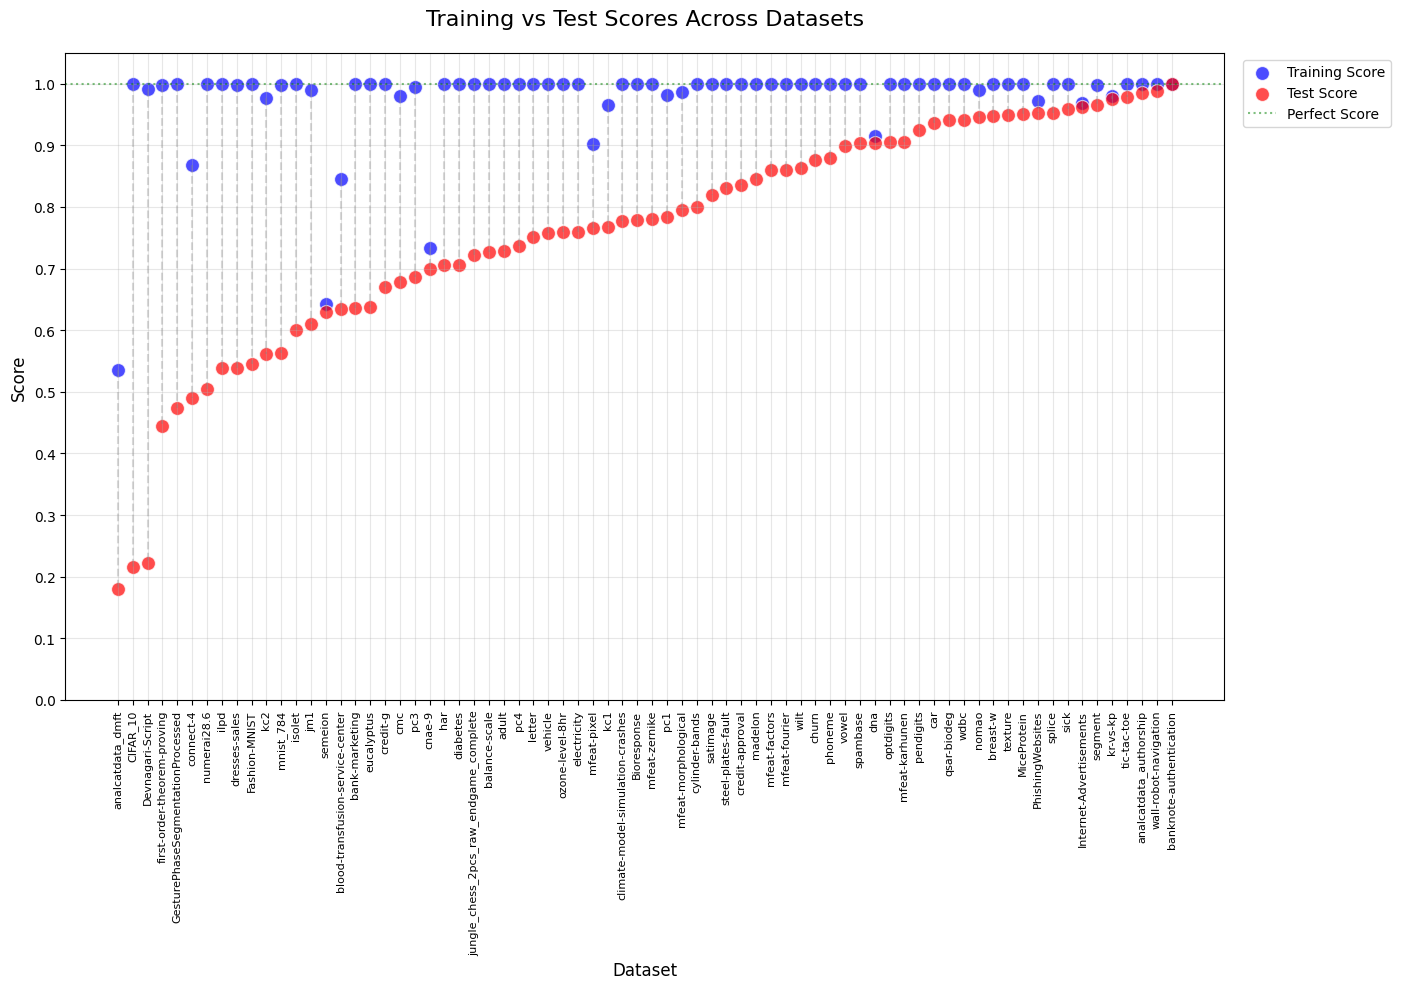

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Your data
data = results

# Convert to DataFrame - correct approach
df = pd.DataFrame.from_dict({(i,j): data[i][j]
                           for i in data.keys()
                           for j in data[i].keys()},
                          orient='index')

# The index is a MultiIndex with (dataset, score_type)
# Let's properly unpack it
df = df.reset_index()
df.columns = ['index', 'score']  # Temporary column names

# Split the multi-index into separate columns
df[['dataset', 'score_type']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df = df.drop(columns=['index'])

# Now pivot the data
plot_df = df.pivot(index='dataset', columns='score_type', values='score')

# Sort by test score for better visualization
plot_df = plot_df.sort_values('testing_score')

# Create figure
plt.figure(figsize=(14, 10), dpi=100)

# Plot training and test scores
sns.scatterplot(data=plot_df, x=plot_df.index, y='training_score',
                color='blue', label='Training Score', s=100, alpha=0.7)
sns.scatterplot(data=plot_df, x=plot_df.index, y='testing_score',
                color='red', label='Test Score', s=100, alpha=0.7)

# Add connecting lines
for i, dataset in enumerate(plot_df.index):
    plt.plot([i, i], [plot_df.loc[dataset, 'training_score'],
                      plot_df.loc[dataset, 'testing_score']],
             color='gray', alpha=0.3, linestyle='--')

# Add perfect score line
plt.axhline(1.0, color='green', linestyle=':', alpha=0.5, label='Perfect Score')

# Customize plot
plt.title('Training vs Test Scores Across Datasets', fontsize=16, pad=20)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0, 1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Save figure before showing it
plt.savefig('xgboost_training_vs_test_scores.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Overfitting Detection with Statistical Analysis

In [24]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel, wilcoxon, shapiro
import matplotlib.pyplot as plt
import seaborn as sns

def detect_overfitting(train_scores, test_scores, alpha=0.05, plot=True, model_name="model"):
    """
    Performs statistical tests to detect overfitting between training and test scores,
    including BOTH paired t-test and Wilcoxon signed-rank test for robustness.

    Parameters:
    -----------
    train_scores : array-like
        Array of training scores (e.g., accuracies) for multiple datasets
    test_scores : array-like
        Array of test scores for the same datasets
    alpha : float, default=0.05
        Significance level for statistical tests
    plot : bool, default=True
        Whether to generate diagnostic plots
    model_name : str, default="model"
        Name of the model for plot filename

    Returns:
    --------
    dict
        Dictionary containing test results and effect sizes
    """

    # Convert to numpy arrays
    train_scores = np.asarray(train_scores)
    test_scores = np.asarray(test_scores)
    differences = train_scores - test_scores

    # Initialize results dictionary
    results = {
        'n_datasets': len(train_scores),
        'mean_train_score': np.mean(train_scores),
        'mean_test_score': np.mean(test_scores),
        'mean_difference': np.mean(differences),
        'median_difference': np.median(differences),
        'std_difference': np.std(differences, ddof=1),
    }

    # Normality test (for interpretation guidance)
    _, shapiro_p = shapiro(differences)
    results['normality_shapiro_p'] = shapiro_p
    results['normal_distribution'] = shapiro_p >= alpha

    # ========================
    # 1. Paired t-test (parametric)
    # ========================
    t_stat, t_p = ttest_rel(train_scores, test_scores, alternative='greater')
    results['paired_ttest'] = {
        'statistic': t_stat,
        'p_value': t_p,
        'significant': t_p < alpha
    }

    # ========================
    # 2. Wilcoxon signed-rank test (non-parametric)
    # ========================
    w_stat, w_p = wilcoxon(train_scores, test_scores, alternative='greater')
    results['wilcoxon_test'] = {
        'statistic': w_stat,
        'p_value': w_p,
        'significant': w_p < alpha
    }

    # ========================
    # Effect size measures
    # ========================
    # Cohen's d (standardized mean difference)
    results['cohens_d'] = results['mean_difference'] / results['std_difference'] if results['std_difference'] > 0 else 0

    # Rank-biserial correlation (for Wilcoxon)
    n = len(differences)
    results['rank_biserial'] = 1 - (2 * w_stat) / (n * (n + 1)) if n > 0 else 0

    # Effect size classification
    for eff_size in ['cohens_d', 'rank_biserial']:
        val = abs(results[eff_size])
        if val > 0.8:
            results[f'{eff_size}_interpret'] = 'large'
        elif val > 0.5:
            results[f'{eff_size}_interpret'] = 'medium'
        else:
            results[f'{eff_size}_interpret'] = 'small'

    # ========================
    # Generate plots
    # ========================
    if plot:
        plt.figure(figsize=(15, 5))

        # Plot 1: Training vs Test scores
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=train_scores, y=test_scores)
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        plt.xlabel('Training Scores')
        plt.ylabel('Test Scores')
        plt.title('Training vs Test Scores')
        plt.grid(True, alpha=0.3)

        # Plot 2: Distribution of differences
        plt.subplot(1, 3, 2)
        sns.histplot(differences, kde=True)
        plt.axvline(results['mean_difference'], color='r', linestyle='--', label='Mean')
        plt.axvline(results['median_difference'], color='g', linestyle=':', label='Median')
        plt.xlabel('Train Score - Test Score')
        plt.title('Distribution of Differences')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot 3: Boxplot of scores
        plt.subplot(1, 3, 3)
        pd.DataFrame({
            'Training': train_scores,
            'Test': test_scores
        }).boxplot()
        plt.title('Score Distributions')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        
        # Save figure before showing it
        plt.savefig(f'overfitting_analysis_{model_name}.png', dpi=300, bbox_inches='tight')
        
        plt.show()

    return results

# Overfitting Detection with Statistical Analysis

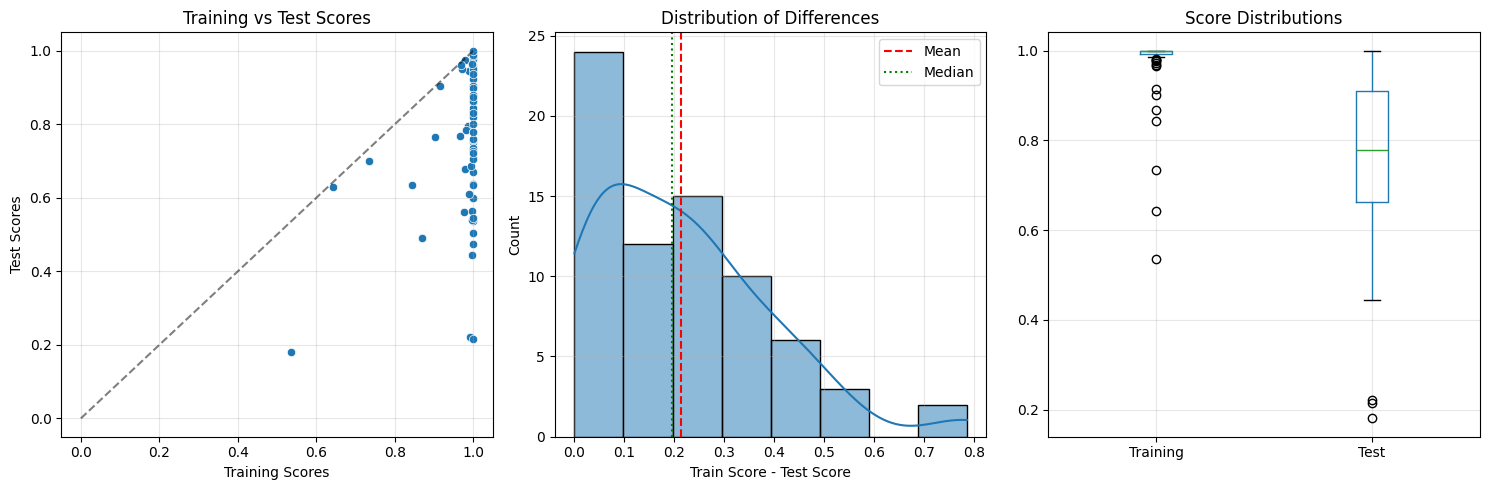

=== Overfitting Detection Report ===
Datasets: 72
Mean training score: 0.975
Mean test score: 0.761
Mean difference: 0.214 (SD=0.176)
Spearman rho: 0.240

=== Normality Test ===
Shapiro-Wilk p-value: 0.0001
Interpretation: Non-normal distribution

=== Statistical Tests ===
1. Paired t-test:
   t = 10.312, p = 0.00000
   Significant: ✅

2. Wilcoxon signed-rank test:
   W = 2556.000, p = 0.00000
   Significant: ✅

=== Effect Sizes ===
Cohen's d: 1.215 (large effect)
Rank-biserial correlation: 0.027 (small effect)


In [25]:
# Run the analysis
training_scores = [result['training_score'] for result in results.values()]
testing_scores = [result['testing_score'] for result in results.values()]
results = detect_overfitting(training_scores, testing_scores, model_name="xgboost")

# Print results in a readable format
print("=== Overfitting Detection Report ===")
print(f"Datasets: {results['n_datasets']}")
print(f"Mean training score: {results['mean_train_score']:.3f}")
print(f"Mean test score: {results['mean_test_score']:.3f}")
print(f"Mean difference: {results['mean_difference']:.3f} (SD={results['std_difference']:.3f})")
print(f"Spearman rho: {stats.spearmanr(training_scores, testing_scores).correlation:.3f}")

print("\n=== Normality Test ===")
print(f"Shapiro-Wilk p-value: {results['normality_shapiro_p']:.4f}")
print("Interpretation:", "Normal distribution" if results['normal_distribution'] else "Non-normal distribution")

print("\n=== Statistical Tests ===")
print("1. Paired t-test:")
print(f"   t = {results['paired_ttest']['statistic']:.3f}, p = {results['paired_ttest']['p_value']:.5f}")
print(f"   Significant: {'✅' if results['paired_ttest']['significant'] else '❌'}")

print("\n2. Wilcoxon signed-rank test:")
print(f"   W = {results['wilcoxon_test']['statistic']:.3f}, p = {results['wilcoxon_test']['p_value']:.5f}")
print(f"   Significant: {'✅' if results['wilcoxon_test']['significant'] else '❌'}")

print("\n=== Effect Sizes ===")
print(f"Cohen's d: {results['cohens_d']:.3f} ({results['cohens_d_interpret']} effect)")
print(f"Rank-biserial correlation: {results['rank_biserial']:.3f} ({results['rank_biserial_interpret']} effect)")

# 2 - Genbooster

# ML Regressor Models Initialization

In [26]:
from os import name
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

estimators = [LinearRegression()]
name_estimators = ["LinearRegression"]

# GenBooster Performance Evaluation Loop with Visualization and Overfitting Analysis


 ---------- GenBooster + LinearRegression


1it [00:00,  8.86it/s]


 ---------- 1 / 72 :  kr-vs-kp
Training Balanced Accuracy: 0.9480928346328172
Testing Balanced Accuracy: 0.9182957393483708

 ---------- 2 / 72 :  letter


3it [00:01,  1.91it/s]

Training Balanced Accuracy: 0.6532232216708022
Testing Balanced Accuracy: 0.6037087912087912

 ---------- 3 / 72 :  balance-scale
Training Balanced Accuracy: 0.6579835623313884
Testing Balanced Accuracy: 0.6492236337971365

 ---------- 4 / 72 :  mfeat-factors


4it [00:02,  1.91it/s]

Training Balanced Accuracy: 0.8712500000000001
Testing Balanced Accuracy: 0.8649999999999999

 ---------- 5 / 72 :  mfeat-fourier


5it [00:02,  1.89it/s]

Training Balanced Accuracy: 0.8174999999999999
Testing Balanced Accuracy: 0.7849999999999999

 ---------- 6 / 72 :  breast-w
Training Balanced Accuracy: 0.9810158838019196
Testing Balanced Accuracy: 0.962409420289855

 ---------- 7 / 72 :  mfeat-karhunen


7it [00:03,  2.41it/s]

Training Balanced Accuracy: 0.8699999999999999
Testing Balanced Accuracy: 0.865

 ---------- 8 / 72 :  mfeat-morphological


8it [00:03,  2.29it/s]

Training Balanced Accuracy: 0.75
Testing Balanced Accuracy: 0.7250000000000001

 ---------- 9 / 72 :  mfeat-zernike


10it [00:04,  2.65it/s]

Training Balanced Accuracy: 0.7987499999999998
Testing Balanced Accuracy: 0.74

 ---------- 10 / 72 :  cmc
Training Balanced Accuracy: 0.539420682309971
Testing Balanced Accuracy: 0.48957420514548927

 ---------- 11 / 72 :  optdigits


13it [00:05,  3.68it/s]

Training Balanced Accuracy: 0.8338839752605576
Testing Balanced Accuracy: 0.865

 ---------- 12 / 72 :  credit-approval
Training Balanced Accuracy: 0.8800414474732983
Testing Balanced Accuracy: 0.7980625931445604

 ---------- 13 / 72 :  credit-g
Training Balanced Accuracy: 0.6815476190476191
Testing Balanced Accuracy: 0.7059523809523809

 ---------- 14 / 72 :  pendigits


14it [00:05,  2.97it/s]

Training Balanced Accuracy: 0.9082342205793651
Testing Balanced Accuracy: 0.8939849624060152

 ---------- 15 / 72 :  diabetes
Training Balanced Accuracy: 0.7434696261682243
Testing Balanced Accuracy: 0.6457407407407407

 ---------- 16 / 72 :  spambase


17it [00:06,  4.49it/s]

Training Balanced Accuracy: 0.8971008789190608
Testing Balanced Accuracy: 0.8953865467099069

 ---------- 17 / 72 :  splice
Training Balanced Accuracy: 0.8904200133868808
Testing Balanced Accuracy: 0.8835470085470085

 ---------- 18 / 72 :  tic-tac-toe


19it [00:06,  5.15it/s]

Training Balanced Accuracy: 0.7092305954129476
Testing Balanced Accuracy: 0.7153432835820895

 ---------- 19 / 72 :  vehicle
Training Balanced Accuracy: 0.7512680047291669
Testing Balanced Accuracy: 0.7388257575757575

 ---------- 20 / 72 :  electricity


20it [00:06,  5.78it/s]

Training Balanced Accuracy: 0.7804471490091439
Testing Balanced Accuracy: 0.7631713554987212

 ---------- 21 / 72 :  satimage


21it [00:06,  4.62it/s]

Training Balanced Accuracy: 0.7904065610735302
Testing Balanced Accuracy: 0.7254887702816034

 ---------- 22 / 72 :  eucalyptus


23it [00:07,  5.23it/s]

Training Balanced Accuracy: 0.5992921311574563
Testing Balanced Accuracy: 0.5444643212085073

 ---------- 23 / 72 :  sick
Training Balanced Accuracy: 0.6421904761904762
Testing Balanced Accuracy: 0.5416666666666666

 ---------- 24 / 72 :  vowel


24it [00:07,  3.22it/s]

Training Balanced Accuracy: 0.7588383838383838
Testing Balanced Accuracy: 0.6565656565656567

 ---------- 25 / 72 :  isolet


26it [00:09,  2.02it/s]

Training Balanced Accuracy: 0.5353598014888339
Testing Balanced Accuracy: 0.4539835164835164

 ---------- 26 / 72 :  analcatdata_authorship
Training Balanced Accuracy: 0.9691163839829222
Testing Balanced Accuracy: 0.9847136047215497

 ---------- 27 / 72 :  analcatdata_dmft


27it [00:09,  2.38it/s]

Training Balanced Accuracy: 0.31318315240756367
Testing Balanced Accuracy: 0.2114058144165671

 ---------- 28 / 72 :  mnist_784


29it [00:10,  2.71it/s]

Training Balanced Accuracy: 0.6018919115939201
Testing Balanced Accuracy: 0.5142492099814755

 ---------- 29 / 72 :  pc4
Training Balanced Accuracy: 0.6706163207080265
Testing Balanced Accuracy: 0.5482954545454546

 ---------- 30 / 72 :  pc3


31it [00:10,  4.20it/s]

Training Balanced Accuracy: 0.5466884375956731
Testing Balanced Accuracy: 0.525

 ---------- 31 / 72 :  jm1
Training Balanced Accuracy: 0.5669233866908285
Testing Balanced Accuracy: 0.5454690237298934

 ---------- 32 / 72 :  kc2
Training Balanced Accuracy: 0.7185861091424521
Testing Balanced Accuracy: 0.651697699890471

 ---------- 33 / 72 :  kc1


34it [00:10,  6.35it/s]

Training Balanced Accuracy: 0.5635553470919324
Testing Balanced Accuracy: 0.5556403893872877

 ---------- 34 / 72 :  pc1
Training Balanced Accuracy: 0.5
Testing Balanced Accuracy: 0.5

 ---------- 35 / 72 :  adult


36it [00:11,  7.22it/s]

Training Balanced Accuracy: 0.7400971341967484
Testing Balanced Accuracy: 0.6551535087719298

 ---------- 36 / 72 :  Bioresponse
Training Balanced Accuracy: 0.7767986723709284
Testing Balanced Accuracy: 0.732331888295191

 ---------- 37 / 72 :  wdbc
Training Balanced Accuracy: 0.9478328173374613
Testing Balanced Accuracy: 0.9623015873015872

 ---------- 38 / 72 :  phoneme


39it [00:11,  8.52it/s]

Training Balanced Accuracy: 0.707737690038575
Testing Balanced Accuracy: 0.6642024281764636

 ---------- 39 / 72 :  qsar-biodeg
Training Balanced Accuracy: 0.8324861723727508
Testing Balanced Accuracy: 0.816967792615868

 ---------- 40 / 72 :  wall-robot-navigation


40it [00:11,  6.95it/s]

Training Balanced Accuracy: 0.653627904631567
Testing Balanced Accuracy: 0.5904361071027737

 ---------- 41 / 72 :  semeion


43it [00:12,  5.58it/s]

Training Balanced Accuracy: 0.5926607850658483
Testing Balanced Accuracy: 0.6

 ---------- 42 / 72 :  ilpd
Training Balanced Accuracy: 0.597766939872203
Testing Balanced Accuracy: 0.5581148121899362

 ---------- 43 / 72 :  madelon
Training Balanced Accuracy: 0.73625
Testing Balanced Accuracy: 0.7

 ---------- 44 / 72 :  nomao


44it [00:12,  6.18it/s]

Training Balanced Accuracy: 0.8829423602789812
Testing Balanced Accuracy: 0.9193963930806036

 ---------- 45 / 72 :  ozone-level-8hr
Training Balanced Accuracy: 0.5
Testing Balanced Accuracy: 0.5

 ---------- 46 / 72 :  cnae-9


46it [00:12,  5.05it/s]

Training Balanced Accuracy: 0.7333304959709455
Testing Balanced Accuracy: 0.699604743083004

 ---------- 47 / 72 :  first-order-theorem-proving


49it [00:13,  6.03it/s]

Training Balanced Accuracy: 0.2568945598032055
Testing Balanced Accuracy: 0.27648809523809526

 ---------- 48 / 72 :  banknote-authentication
Training Balanced Accuracy: 0.9954954954954955
Testing Balanced Accuracy: 1.0

 ---------- 49 / 72 :  blood-transfusion-service-center
Training Balanced Accuracy: 0.5951321966889054
Testing Balanced Accuracy: 0.611842105263158

 ---------- 50 / 72 :  PhishingWebsites


52it [00:13,  7.65it/s]

Training Balanced Accuracy: 0.9133593601218816
Testing Balanced Accuracy: 0.9122886931875696

 ---------- 51 / 72 :  cylinder-bands
Training Balanced Accuracy: 0.6772527472527472
Testing Balanced Accuracy: 0.6669004207573632

 ---------- 52 / 72 :  bank-marketing
Training Balanced Accuracy: 0.5602668372475554
Testing Balanced Accuracy: 0.5917464996315401

 ---------- 53 / 72 :  GesturePhaseSegmentationProcessed


53it [00:13,  6.39it/s]

Training Balanced Accuracy: 0.4052738438032556
Testing Balanced Accuracy: 0.3567099567099567

 ---------- 54 / 72 :  har


54it [00:14,  5.25it/s]

Training Balanced Accuracy: 0.6586891684653934
Testing Balanced Accuracy: 0.6022327522327522

 ---------- 55 / 72 :  dresses-sales
Training Balanced Accuracy: 0.6180213464696224
Testing Balanced Accuracy: 0.5049261083743842

 ---------- 56 / 72 :  texture


57it [00:14,  4.54it/s]

Training Balanced Accuracy: 0.9217171717171717
Testing Balanced Accuracy: 0.9090909090909093

 ---------- 57 / 72 :  connect-4
Training Balanced Accuracy: 0.36527957383567194
Testing Balanced Accuracy: 0.36229643372500514

 ---------- 58 / 72 :  MiceProtein


58it [00:15,  3.75it/s]

Training Balanced Accuracy: 0.7886130536130537
Testing Balanced Accuracy: 0.7212312030075188

 ---------- 59 / 72 :  steel-plates-fault


61it [00:15,  4.85it/s]

Training Balanced Accuracy: 0.5668243559177928
Testing Balanced Accuracy: 0.5421214137829045

 ---------- 60 / 72 :  climate-model-simulation-crashes
Training Balanced Accuracy: 0.6486486486486487
Testing Balanced Accuracy: 0.6111111111111112

 ---------- 61 / 72 :  wilt
Training Balanced Accuracy: 0.6660061646851607
Testing Balanced Accuracy: 0.6818181818181819

 ---------- 62 / 72 :  car


62it [00:16,  5.00it/s]

Training Balanced Accuracy: 0.5475360592569449
Testing Balanced Accuracy: 0.5132936507936507

 ---------- 63 / 72 :  segment


63it [00:16,  4.22it/s]

Training Balanced Accuracy: 0.821012708763058
Testing Balanced Accuracy: 0.8258268824771289

 ---------- 64 / 72 :  mfeat-pixel


64it [00:16,  3.21it/s]

Training Balanced Accuracy: 0.7024999999999999
Testing Balanced Accuracy: 0.7100000000000001

 ---------- 65 / 72 :  Fashion-MNIST


66it [00:17,  3.24it/s]

Training Balanced Accuracy: 0.5262499999999999
Testing Balanced Accuracy: 0.43499999999999994

 ---------- 66 / 72 :  jungle_chess_2pcs_raw_endgame_complete
Training Balanced Accuracy: 0.5535725243283519
Testing Balanced Accuracy: 0.5305783752385694

 ---------- 67 / 72 :  numerai28.6


67it [00:17,  3.97it/s]

Training Balanced Accuracy: 0.6070716881814764
Testing Balanced Accuracy: 0.5743074307430743

 ---------- 68 / 72 :  Devnagari-Script


68it [00:20,  1.11it/s]

Training Balanced Accuracy: 0.2718190537084399
Testing Balanced Accuracy: 0.15

 ---------- 69 / 72 :  CIFAR_10


70it [00:20,  1.70it/s]

Training Balanced Accuracy: 0.29875
Testing Balanced Accuracy: 0.205

 ---------- 70 / 72 :  Internet-Advertisements
Training Balanced Accuracy: 0.9168827257490049
Testing Balanced Accuracy: 0.9555647840531561

 ---------- 71 / 72 :  dna


72it [00:21,  3.40it/s]

Training Balanced Accuracy: 0.8917670682730924
Testing Balanced Accuracy: 0.8936965811965812

 ---------- 72 / 72 :  churn
Training Balanced Accuracy: 0.5900049020872572
Testing Balanced Accuracy: 0.5955149501661129


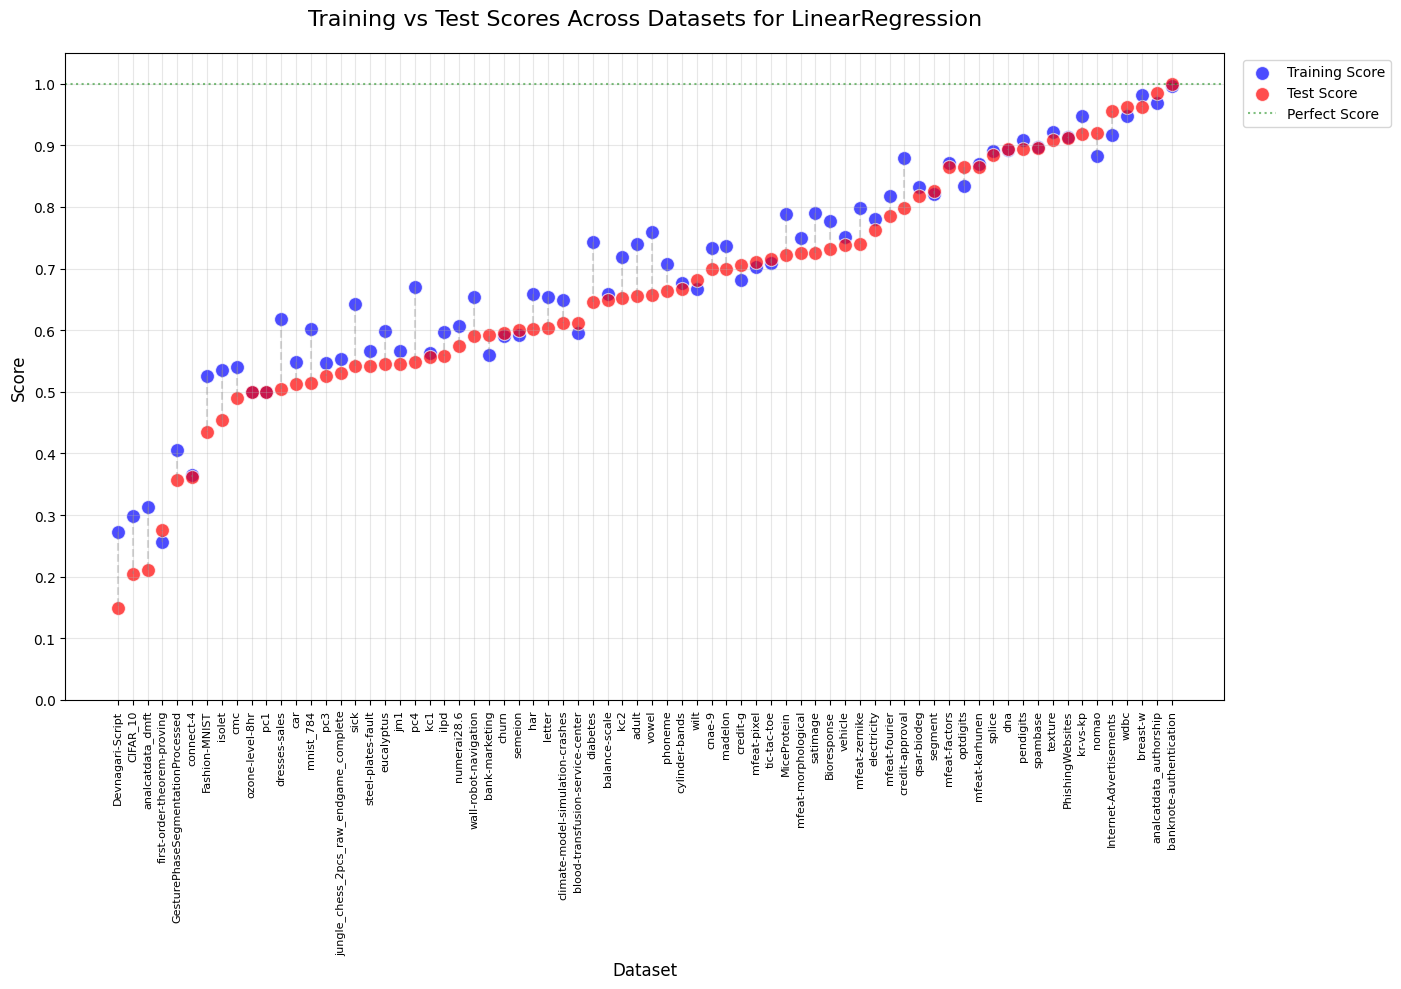

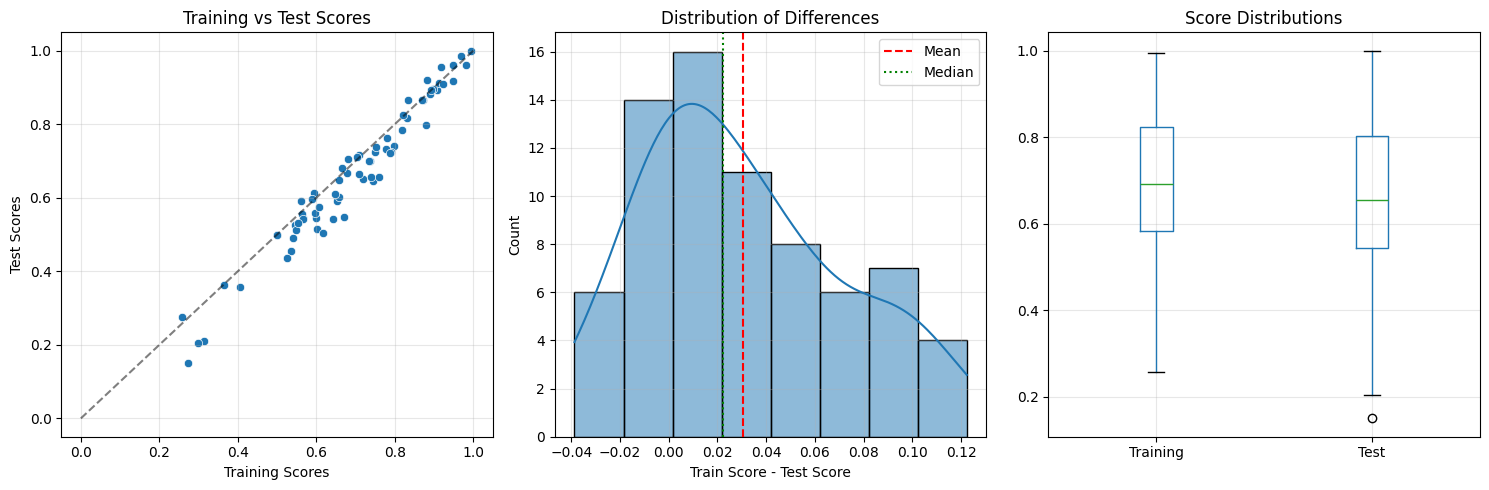

=== Overfitting Detection Report ===
Datasets: 72
Mean training score: 0.692
Mean test score: 0.661
Mean difference: 0.031 (SD=0.041)
Spearman rho: 0.972

=== Normality Test ===
Shapiro-Wilk p-value: 0.0153
Interpretation: Non-normal distribution

=== Statistical Tests ===
1. Paired t-test:
   t = 6.302, p = 0.00000
   Significant: ✅

2. Wilcoxon signed-rank test:
   W = 2125.000, p = 0.00000
   Significant: ✅

=== Effect Sizes ===
Cohen's d: 0.743 (medium effect)
Rank-biserial correlation: 0.191 (small effect)


In [27]:
balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)

for j, est in enumerate(estimators):
  results = {}
  print("\n ---------- GenBooster +", name_estimators[j])
  try:
    for i, dataset in tqdm(enumerate(clf_datasets.items())):
      dataset_name = dataset[0]
      print("\n ----------", (i + 1), "/", len(clf_datasets.items()), ": ", dataset_name)
      try:
        X, y = dataset[1]['dataset'][0], dataset[1]['dataset'][1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_train = X_train.astype(np.float64)
        X_test = X_test.astype(np.float64)
        # Split dataset into training and testing sets
        model = BoosterClassifier(base_estimator=est)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred = model.predict(X_test)
        # Calculate balanced accuracy
        balanced_acc_train = balanced_accuracy_score(y_train, y_pred_train)
        balanced_acc_test = balanced_accuracy_score(y_test, y_pred)
        print("Training Balanced Accuracy:", balanced_acc_train)
        print("Testing Balanced Accuracy:", balanced_acc_test)
        results[dataset_name] = {"training_score": balanced_acc_train,
                                "testing_score": balanced_acc_test}
      except Exception as e:
        print("Error", e)
        continue
  except Exception as e:
    print("Error", e)
    continue

  # Your data
  data = results

  # Convert to DataFrame - correct approach
  df = pd.DataFrame.from_dict({(i,j): data[i][j]
                            for i in data.keys()
                            for j in data[i].keys()},
                            orient='index')

  # The index is a MultiIndex with (dataset, score_type)
  # Let's properly unpack it
  df = df.reset_index()
  df.columns = ['index', 'score']  # Temporary column names

  # Split the multi-index into separate columns
  df[['dataset', 'score_type']] = pd.DataFrame(df['index'].tolist(), index=df.index)
  df = df.drop(columns=['index'])

  # Now pivot the data
  plot_df = df.pivot(index='dataset', columns='score_type', values='score')

  # Sort by test score for better visualization
  plot_df = plot_df.sort_values('testing_score')

  # Create figure
  plt.figure(figsize=(14, 10), dpi=100)

  # Plot training and test scores
  sns.scatterplot(data=plot_df, x=plot_df.index, y='training_score',
                  color='blue', label='Training Score', s=100, alpha=0.7)
  sns.scatterplot(data=plot_df, x=plot_df.index, y='testing_score',
                  color='red', label='Test Score', s=100, alpha=0.7)

  # Add connecting lines
  for i, dataset in enumerate(plot_df.index):
      plt.plot([i, i], [plot_df.loc[dataset, 'training_score'],
                        plot_df.loc[dataset, 'testing_score']],
              color='gray', alpha=0.3, linestyle='--')

  # Add perfect score line
  plt.axhline(1.0, color='green', linestyle=':', alpha=0.5, label='Perfect Score')

  # Customize plot
  plt.title(f'Training vs Test Scores Across Datasets for {name_estimators[j]}', fontsize=16, pad=20)
  plt.xlabel('Dataset', fontsize=12)
  plt.ylabel('Score', fontsize=12)
  plt.xticks(rotation=90, fontsize=8)
  plt.yticks(np.arange(0, 1.1, 0.1))
  plt.ylim(0, 1.05)
  plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
  plt.grid(True, alpha=0.3)

  # Adjust layout
  plt.tight_layout()
  
  # Save figure before showing it
  plt.savefig(f'genbooster_{name_estimators[j]}_training_vs_test_scores.png', dpi=300, bbox_inches='tight')
  
  plt.show()

  # Run the analysis
  training_scores = [result['training_score'] for result in results.values()]
  testing_scores = [result['testing_score'] for result in results.values()]
  results = detect_overfitting(training_scores, testing_scores, model_name=f"genbooster_{name_estimators[j]}")

  # Print results in a readable format
  print("=== Overfitting Detection Report ===")
  print(f"Datasets: {results['n_datasets']}")
  print(f"Mean training score: {results['mean_train_score']:.3f}")
  print(f"Mean test score: {results['mean_test_score']:.3f}")
  print(f"Mean difference: {results['mean_difference']:.3f} (SD={results['std_difference']:.3f})")
  print(f"Spearman rho: {stats.spearmanr(training_scores, testing_scores).correlation:.3f}")

  print("\n=== Normality Test ===")
  print(f"Shapiro-Wilk p-value: {results['normality_shapiro_p']:.4f}")
  print("Interpretation:", "Normal distribution" if results['normal_distribution'] else "Non-normal distribution")

  print("\n=== Statistical Tests ===")
  print("1. Paired t-test:")
  print(f"   t = {results['paired_ttest']['statistic']:.3f}, p = {results['paired_ttest']['p_value']:.5f}")
  print(f"   Significant: {'✅' if results['paired_ttest']['significant'] else '❌'}")

  print("\n2. Wilcoxon signed-rank test:")
  print(f"   W = {results['wilcoxon_test']['statistic']:.3f}, p = {results['wilcoxon_test']['p_value']:.5f}")
  print(f"   Significant: {'✅' if results['wilcoxon_test']['significant'] else '❌'}")

  print("\n=== Effect Sizes ===")
  print(f"Cohen's d: {results['cohens_d']:.3f} ({results['cohens_d_interpret']} effect)")
  print(f"Rank-biserial correlation: {results['rank_biserial']:.3f} ({results['rank_biserial_interpret']} effect)")

## Conclusion: The Overfitting Dilemma

This analysis reveals an interesting trade-off between performance and model reliability when comparing XGBoost with default hyperparameters versus GenericBooster with LinearRegression as a base learner:

1. **XGBoost Default Hyperparameters**:
   - Exhibits significant overfitting, with a large gap between training accuracy (0.975) and test accuracy (0.761)
   - Shows a mean difference of 0.214 between training and test scores, with a Cohen's d of 1.215 (large effect)
   - Has a low Spearman correlation (0.240) between training and test scores, indicating unreliable performance estimation
   - Despite the overfitting, produces higher absolute test set balanced accuracy (0.761)

2. **GenericBooster + LinearRegression Default Hyperparameters**:
   - Shows much less overfitting, with training accuracy (0.692) closely matching test accuracy (0.661)
   - Has a small mean difference of 0.031 between training and test scores, with a Cohen's d of 0.743 (medium effect)
   - Demonstrates a remarkably high Spearman correlation (0.972) between training and test scores, indicating highly reliable performance estimation
   - Produces lower absolute test set balanced accuracy (0.661) compared to XGBoost

This presents practitioners with an interesting dilemma:

- **Prioritizing absolute performance**: If achieving the highest possible test set performance is the goal and you have resources for hyperparameter tuning, XGBoost may be preferable despite its tendency to overfit with default settings.

- **Prioritizing reliable estimation**: If you need a model that provides honest estimates of performance during training or if hyperparameter tuning is not feasible, GenericBooster with LinearRegression offers much more consistent and trustworthy performance across training and test environments.

- **Data efficiency**: The high correlation between training and test scores for GenericBooster suggests it may be more data-efficient and less prone to overfitting on small datasets or in low-data regimes.

This comparison highlights the importance of considering not just absolute performance metrics but also the reliability of performance estimates when selecting models for practical applications. For critical applications where understanding model limitations is crucial, the more honest performance estimation of GenericBooster might outweigh the higher but potentially less reliable test performance of XGBoost with default parameters.